# 🏪 Proyecto Aurelion

Este notebook documenta el proceso de **análisis, limpieza y transformación de datos** de la tabla `VENTAS` del proyecto *Aurelion*, utilizando la biblioteca **Pandas** en Python.

El objetivo es preparar un conjunto de datos estructurado, limpio y estandarizado para posteriores procesos de análisis estadístico, modelado o visualización.

## 📊 Descripción General

La tabla `VENTAS` contiene información detallada sobre operaciones comerciales, incluyendo campos de identificación, fechas, montos y categorías de productos.

A lo largo de este notebook se realizarón las siguientes tareas principales:

- Importación de los datos desde un archivo **Excel (.xlsx)**.  
- Creación del dataframe inicial `df_ventas_c`.  
- Procesamiento, normalización y renombrado de columnas para generar el dataframe limpio `df_ventas`.  
- Aplicación de operaciones básicas de **limpieza**, **transformación** y **estandarización** de los datos.  
- Generación de **estadísticas descriptivas** para comprender la distribución y consistencia de las variables.

## ⚙️ Limpieza y Transformación de los Datos

En esta sección se detallan las operaciones realizadas para asegurar la integridad y coherencia del dataset:

1. **Revisión de valores nulos y duplicados.**  
   - Identificación y tratamiento de valores faltantes.  
   - Eliminación o imputación según el contexto de negocio.

2. **Estandarización de tipos de datos.**  
   - Conversión de fechas, montos y categorías al formato correcto.  
   - Normalización de cadenas y eliminación de espacios o caracteres no deseados.

3. **Renombrado de columnas.**  
   - Aplicación de nombres consistentes y descriptivos conforme a las buenas prácticas de análisis de datos.

4. **Validación del dataframe final.**  
   - Verificación de dimensiones, tipos y contenido.  
   - Comparación con el dataframe original (`df_ventas_c`).

## 📝 Validación y Preparación Final del Dataset

Tras completar el proceso de limpieza y transformación, se realizarón una verificación integral del dataframe resultante df_ventas con el fin de asegurar su consistencia y calidad para análisis posteriores.

En esta etapa se incluyen las siguientes tareas:

- Comparación estructural entre el dataframe original (df_ventas_c) y el limpio (df_ventas).

- Verificación de dimensiones, tipos de datos y valores válidos.

- Confirmación de la eliminación de duplicados y valores nulos.

- Validación de nombres de columnas y formato general conforme a las convenciones de análisis.

- Consolidación del dataset final, listo para ser exportado o utilizado en etapas de modelado o visualización.

#### 🔧 Importamos librerias instaladas para implementarlas en el código

In [345]:
# Importa librerías de análisis: pandas/numpy para ETL, matplotlib/seaborn para gráficos y Path para rutas portables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path



## 📥 Carga del Archivo de Datos

En esta sección se realiza la **importación del dataset principal** utilizando una **ruta relativa** y la librería `pathlib.Path`. Esto no solo simplifica la ruta, sino que también garantiza que el código sea **portable** y funcione correctamente en diferentes sistemas operativos (Windows, macOS, Linux), siempre y cuando la estructura de directorios se mantenga consistente.

> 📂 **Ruta del archivo:**   
> El archivo se accede mediante la construcción **`Path('db') / 'ventas.xlsx'`**.

La lectura del archivo se efectúa mediante la función `pd.read_excel()` de la biblioteca **pandas**, creando el dataframe inicial `df_ventas_c`, el cual servirá como base para los procesos posteriores de limpieza y análisis.

In [346]:
# Lee el libro de ventas con Path para mantener rutas relativas entre entornos
path_dataset = Path('db') / 'ventas.xlsx'
df_ventas_c = pd.read_excel(path_dataset)

# Genera una vista inicial para auditar columnas y tipos cargados
df_ventas_c.head()


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr
2,3,2024-01-13,20,Tomas Acosta,tomas.acosta@mail.com,tarjeta
3,4,2024-02-27,36,Martina Molina,martina.molina@mail.com,transferencia
4,5,2024-06-11,56,Bruno Diaz,bruno.diaz@mail.com,tarjeta


## 🔍 Inspección Inicial del Dataset

En esta etapa se realiza una **inspección exploratoria básica** del DataFrame `df_ventas_c` recién cargado, con el objetivo de verificar que los datos se hayan importado correctamente y posean la estructura esperada.

Para ello, se utilizan las funciones:

In [347]:
# Revisa las primeras 8 filas para detectar inconsistencias tempranas
df_ventas_c.head(8)


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr
2,3,2024-01-13,20,Tomas Acosta,tomas.acosta@mail.com,tarjeta
3,4,2024-02-27,36,Martina Molina,martina.molina@mail.com,transferencia
4,5,2024-06-11,56,Bruno Diaz,bruno.diaz@mail.com,tarjeta
5,6,2024-05-05,91,Uma Sanchez,uma.sanchez@mail.com,transferencia
6,7,2024-05-06,92,Mariana Rodriguez,mariana.rodriguez@mail.com,efectivo
7,8,2024-01-06,66,Tomas Herrera,tomas.herrera@mail.com,transferencia


In [348]:
# Contrasta las últimas 4 filas para identificar valores atípicos al final del dataset
df_ventas_c.tail(4)


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
116,117,2024-03-14,72,Camila Rodriguez,camila.rodriguez@mail.com,tarjeta
117,118,2024-02-09,84,Pablo Sanchez,pablo.sanchez@mail.com,efectivo
118,119,2024-02-07,51,Agustina Gomez,agustina.gomez@mail.com,qr
119,120,2024-04-21,72,Camila Rodriguez,camila.rodriguez@mail.com,tarjeta


## 🧠 Exploración de Tipos de Datos y Valores Nulos

En esta etapa se realiza una **revisión estructural del DataFrame** para confirmar que los tipos de datos asignados a cada variable durante la lectura con `pd.read_excel()` sean correctos y coherentes con la naturaleza de la información (por ejemplo, fechas, números, textos, etc.).

Además, se evalúa la **presencia de valores nulos o faltantes**, los cuales podrían requerir tratamiento posterior durante el proceso de limpieza y estandarización.

### 🧩 Procedimiento

In [349]:
# Inspecciona estructura, tipos dtypes y memoria del dataframe importado
df_ventas_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_venta        120 non-null    int64         
 1   fecha           120 non-null    datetime64[ns]
 2   id_cliente      120 non-null    int64         
 3   nombre_cliente  120 non-null    object        
 4   email           120 non-null    object        
 5   medio_pago      120 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 5.8+ KB


> 💡 **Conclusión:**  
> A partir de la ejecución del comando `df_ventas_c.info()`, se observa que la base de datos cuenta con **120 registros** distribuidos en **6 columnas**.  
> Cada columna presenta **120 valores no nulos**, lo que indica que **no existen datos faltantes (NaN)** en el dataset.  
> Además, los tipos de datos se encuentran correctamente definidos: campos numéricos (`int64`), de texto (`object`) y de fecha (`datetime64[ns]`), lo que refleja una estructura **coherente y lista para iniciar el proceso de limpieza y transformación**.

### 🕵️‍♂️ Detección de Valores Nulos

Se analiza la presencia de valores faltantes para priorizar acciones de limpieza y asegurar la consistencia del dataset.

In [350]:
# Visualiza la máscara booleana donde True marca valores faltantes por celda
df_ventas_c.isnull()

,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
115,False,False,False,False,False,False
116,False,False,False,False,False,False
117,False,False,False,False,False,False
118,False,False,False,False,False,False


In [351]:
# Resume la cantidad de nulos por columna para priorizar limpieza
df_ventas_c.isnull().sum()


id_venta          0
fecha             0
id_cliente        0
nombre_cliente    0
email             0
medio_pago        0
dtype: int64

In [352]:
# Resumen detallado y prolijo de df_ventas_c (incluye métricas numéricas y categóricas)
import pandas as pd
import numpy as np

df = df_ventas_c.copy()
total_rows = len(df)
print('=== Resumen detallado de df_ventas_c ===')
print(f'Tamaño del dataframe: {total_rows:,} filas x {df.shape[1]:,} columnas')
print('\nMemoria (approx):', f"{df.memory_usage(deep=True).sum()/1024**2:.2f} MB")

for col in df.columns:
    s = df[col]
    print('\n' + '='*80)
    print(f"Columna: {col}    |    dtype: {s.dtype}")
    n = len(s)
    n_missing = s.isna().sum()
    pct_missing = (n_missing / n * 100) if n>0 else 0
    n_unique = s.nunique(dropna=True)
    print(f"Count: {n:,}    |    Missing: {n_missing:,} ({pct_missing:.2f}%)    |    Unique: {n_unique:,}")

    # Numéricas: percentiles, medias, dispersión, skew/kurtosis, negativos/ceros
    if pd.api.types.is_numeric_dtype(s):
        s_num = pd.to_numeric(s, errors='coerce').dropna()
        if s_num.empty:
            print('  (No hay valores numéricos tras coerción)')
            continue
        p = s_num.quantile([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).to_dict()
        print('  --- Estadísticas numéricas ---')
        print(f"  Min: {s_num.min():,.2f}    |    1%: {p.get(0.01, np.nan):,.2f}    |    5%: {p.get(0.05, np.nan):,.2f}    |    10%: {p.get(0.1, np.nan):,.2f}")
        print(f"  Q1: {p.get(0.25, np.nan):,.2f}    |    Mediana: {p.get(0.5, np.nan):,.2f}    |    Q3: {p.get(0.75, np.nan):,.2f}    |    90%: {p.get(0.9, np.nan):,.2f}    |    Max: {s_num.max():,.2f}")
        print(f"  Mean: {s_num.mean():,.2f}    |    Std: {s_num.std():,.2f}    |    Skew: {s_num.skew():.3f}    |    Kurtosis: {s_num.kurtosis():.3f}")
        zeros = (s_num == 0).sum()
        neg = (s_num < 0).sum()
        pct_zeros = zeros / len(s_num) * 100 if len(s_num)>0 else 0
        pct_neg = neg / len(s_num) * 100 if len(s_num)>0 else 0
        print(f"  Zeros: {zeros} ({pct_zeros:.2f}%)    |    Negativos: {neg} ({pct_neg:.2f}%)")

        # IQR and outlier counts (robust)
        q1 = s_num.quantile(0.25)
        q3 = s_num.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = s_num[(s_num < lower) | (s_num > upper)]
        n_out = len(outliers)
        pct_out = n_out / len(s_num) * 100 if len(s_num)>0 else 0
        print(f"  IQR: {iqr:,.2f}    |    Límites IQR: [{lower:,.2f}, {upper:,.2f}]    |    Outliers IQR: {n_out} ({pct_out:.2f}%)")
        if n_out>0:
            # show small sample of top outliers
            top_out = outliers.sort_values(ascending=False).head(5)
            print('  Top outliers (mayores):')
            for i, v in enumerate(top_out):
                print(f"    {i+1}. {v:,.2f}")

    else:
        # Categóricas / object: moda, freq, ejemplo de distribución
        print('  --- Estadísticas categóricas / texto ---')
        nonnull = s.dropna()
        if nonnull.empty:
            print('  (Todos los valores son NaN)')
        else:
            try:
                top = nonnull.mode().iloc[0]
                freq = nonnull.value_counts(dropna=True).iloc[0]
                pct_top = freq / len(nonnull) * 100 if len(nonnull)>0 else 0
                print(f"  Top (moda): {top}    |    Freq: {freq:,}    |    Top%: {pct_top:.2f}%")
            except Exception as e:
                print('  No se pudo calcular moda/frecuencia:', e)
            if n_unique <= 10:
                print('  Distribución de valores:')
                vc = nonnull.value_counts(dropna=True)
                for v, cnt in vc.items():
                    print(f"    {v} -> {cnt}")
            else:
                print(f"  Distintos valores >10; ejemplos: {list(nonnull.unique()[:10])}")

# Mostrar la tabla describe(include='all') al final como referencia
print('\n' + '='*80)
print('\nTabla resumen (pandas .describe include=all):')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.describe(include='all'))

=== Resumen detallado de df_ventas_c ===
Tamaño del dataframe: 120 filas x 6 columnas

Memoria (approx): 0.02 MB

Columna: id_venta    |    dtype: int64
Count: 120    |    Missing: 0 (0.00%)    |    Unique: 120
  --- Estadísticas numéricas ---
  Min: 1.00    |    1%: 2.19    |    5%: 6.95    |    10%: 12.90
  Q1: 30.75    |    Mediana: 60.50    |    Q3: 90.25    |    90%: 108.10    |    Max: 120.00
  Mean: 60.50    |    Std: 34.79    |    Skew: 0.000    |    Kurtosis: -1.200
  Zeros: 0 (0.00%)    |    Negativos: 0 (0.00%)
  IQR: 59.50    |    Límites IQR: [-58.50, 179.50]    |    Outliers IQR: 0 (0.00%)

Columna: fecha    |    dtype: datetime64[ns]
Count: 120    |    Missing: 0 (0.00%)    |    Unique: 93
  --- Estadísticas categóricas / texto ---
  Top (moda): 2024-01-13 00:00:00    |    Freq: 3    |    Top%: 2.50%
  Distintos valores >10; ejemplos: [Timestamp('2024-06-19 00:00:00'), Timestamp('2024-03-17 00:00:00'), Timestamp('2024-01-13 00:00:00'), Timestamp('2024-02-27 00:00:00'), T

,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
count,120.000000,120,120.000000,120,120,120
unique,NaN,NaN,NaN,64,67,4
top,NaN,NaN,NaN,Bruno Diaz,bruno.diaz@mail.com,efectivo
freq,NaN,NaN,NaN,5,5,37
mean,60.500000,2024-03-29 17:36:00,47.291667,NaN,NaN,NaN
min,1.000000,2024-01-02 00:00:00,1.000000,NaN,NaN,NaN
25%,30.750000,2024-02-11 06:00:00,24.500000,NaN,NaN,NaN
50%,60.500000,2024-03-25 00:00:00,48.500000,NaN,NaN,NaN
75%,90.250000,2024-05-19 06:00:00,67.500000,NaN,NaN,NaN
max,120.000000,2024-06-28 00:00:00,100.000000,NaN,NaN,NaN


> 💬 Conclusión: El número de **`valores únicos (o clases)`** en la variable categórica **`medio_pago`** es **`Unique = 4`**. Dado que se identificaron cuatro clases distintas dentro de la categoría `medio_pago`, esta característica es apta para ser `codificada` mediante la **técnica de `One-Hot-Encoding`**. Este método de codificación resultará en la creación de **cuatro nuevas variables binarias (0 o 1)** para su uso en el modelado.

## ⚙️ Normalización y Corrección de Tipos de Datos

Antes de realizar la normalización de la base de datos, es necesario **verificar y corregir los tipos de datos** asignados a las variables y estandarizar los campos de texto. En este caso, la columna `fecha` se convierte al formato `datetime` para permitir análisis temporal. Adicionalmente, se **normalizan** los campos de texto (`nombre_cliente` y `email`) y se optimiza `medio_pago` a tipo `categórico` para mejorar la eficiencia del DataFrame.

### 🧩 Fundamento

Corregir los tipos de datos garantiza la **precisión numérica** en cálculos y estadísticas.  
Si se mantuvieran como enteros, se perdería información decimal y se podrían producir errores al calcular promedios, totales o al aplicar operaciones aritméticas.

Este paso forma parte del proceso de **limpieza estructural** dentro de la metodología ETL (Extract, Transform, Load):

1. **Extracción:** se importan los datos desde el archivo Excel.  
2. **Transformación estructural:** se ajustan los tipos de datos para asegurar coherencia.  
3. **Normalización:** se reorganiza la base, eliminando redundancias o columnas innecesarias.

### 🧮 Procedimiento

- Se aplican las transformaciones para:

     **Fecha:** Asegurar formato `datetime` (día-mes-año), tratando los errores como `NaT`.

     **Texto:** Limpiar `nombre_cliente` (eliminar espacios, formato título) y `email` (eliminar espacios, minúsculas).

     **Categórica:** Convertir `medio_pago` a tipo `category`.

In [353]:
# Convierte fecha al formato datetime (día-mes-año) y marca entradas inválidas como NaT
df_ventas_c['fecha'] = pd.to_datetime(df_ventas_c['fecha'], dayfirst=True, errors='coerce')

# Normaliza campos de texto: elimina espacios, ajusta capitalización y homogeniza correos
df_ventas_c['nombre_cliente'] = df_ventas_c['nombre_cliente'].str.strip().str.title()
df_ventas_c['email'] = df_ventas_c['email'].str.lower().str.strip()

# Define medio_pago como categoría para optimizar memoria y habilitar análisis estadístico
df_ventas_c['medio_pago'] = df_ventas_c['medio_pago'].astype('category')


#### 🕵️‍♂️ Verificación de Transformaciones

Se valida que los cambios aplicados hayan surtido efecto tanto en los tipos de datos como en los valores muestreados.

In [354]:
# Verifica los tipos de datos de las columnas normalizadas tras la conversión
df_ventas_c[["fecha", "nombre_cliente", "email", "medio_pago"]].dtypes

fecha             datetime64[ns]
nombre_cliente            object
email                     object
medio_pago              category
dtype: object

In [355]:
# Realiza muestreo de las columnas transformadas para comprobar resultados
df_ventas_c[["fecha", "nombre_cliente", "email", "medio_pago"]].head()

,fecha,nombre_cliente,email,medio_pago
0,2024-06-19,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2024-03-17,Olivia Gomez,olivia.gomez@mail.com,qr
2,2024-01-13,Tomas Acosta,tomas.acosta@mail.com,tarjeta
3,2024-02-27,Martina Molina,martina.molina@mail.com,transferencia
4,2024-06-11,Bruno Diaz,bruno.diaz@mail.com,tarjeta


#### 🕵️‍♂️ Control de Calidad: Duplicados

Se evalúa la unicidad de registros, especialmente en la columna `id_venta`, que actúa como identificador clave.

In [356]:
# Evalúa duplicados globales y por id_venta para validar la unicidad clave de ventas
cantidad_duplicados = df_ventas_c.duplicated().sum()
duplicados_id_venta = df_ventas_c['id_venta'].duplicated().sum()

print()
print('--- Registros Duplicados ---')
if cantidad_duplicados > 0:
    print(f'Se encontraron {cantidad_duplicados} filas duplicadas.')
else:
    print('No se encontraron filas duplicadas.')

if duplicados_id_venta > 0:
    print(f'Alerta: se detectaron {duplicados_id_venta} valores repetidos en id_venta (posible clave primaria).')
else:
    print('id_venta es único en df_ventas_c.')



--- Registros Duplicados ---
No se encontraron filas duplicadas.
id_venta es único en df_ventas_c.


> 💡 **Conclusión:**                                                                 
> Luego de la verificación y **normalización optimizada** de tipos de datos, se confirma que todas las variables del *dataset* `VENTAS` presentan formatos consistentes y adecuados:
> * La columna **`fecha`** se encuentra correctamente definida como **`datetime64[ns]`**, interpretada bajo el formato **día-mes-año (dd-mm-yyyy)** conforme al estándar de la República Argentina.
> * Las columnas **`nombre_cliente`** y **`email`** se mantienen como texto (`object` o `string`), asegurando su **normalización** (mayúsculas, minúsculas y eliminación de espacios) con un código más limpio y eficiente al **eliminar pasos de conversión redundantes**.
> * La variable **`medio_pago`** fue convertida al tipo **categórico (`category`)**, lo que facilita su uso en análisis descriptivos y segmentaciones, optimizando el uso de memoria.
> De esta forma, el *dataframe* `df_ventas_c` queda estructurado de manera coherente, **garantizando integridad, consistencia, y una ligera mejora en la eficiencia del procesamiento** para las etapas posteriores de transformación y análisis.

#### 🧩 Normalización de la Base de Datos

En esta etapa se aplica la **forma de normalización** sobre el DataFrame `df_ventas_c`, eliminando las columnas **`nombre_cliente`** y **`email`**. 
Estas **columnas presentan información descriptiva redundante** respecto a **`id_cliente`** (la clave foránea del cliente en esta tabla transaccional), por lo que se suprimen para evitar duplicidad de datos y mantener la integridad estructural de la base de datos (Primera Forma Normal).

In [357]:
# Crea df_ventas_True excluyendo columnas personales redundantes frente a id_cliente
df_ventas_True = df_ventas_c.drop(columns=['nombre_cliente', 'email'])


In [358]:
# Inspecciona las primeras filas del dataset anonimizado para asegurar integridad
df_ventas_True.head()


,id_venta,fecha,id_cliente,medio_pago
0,1,2024-06-19,62,tarjeta
1,2,2024-03-17,49,qr
2,3,2024-01-13,20,tarjeta
3,4,2024-02-27,36,transferencia
4,5,2024-06-11,56,tarjeta


#### 🔎 Revisión de Integridad de **df_ventas_True**

In [359]:
## Auditoría de integridad: nulos y duplicados en df_ventas_True

# Paso 1: contabiliza nulos por columna para definir tratamientos
print('--- Valores Nulos en df_ventas_True ---')
print(df_ventas_True.isnull().sum())
print('-' * 37)

# Paso 2: identifica y elimina duplicados manteniendo consistencia de id_venta
cantidad_duplicados = df_ventas_True.duplicated().sum()
duplicados_id_venta = df_ventas_True['id_venta'].duplicated().sum()

print()
print('--- Registros Duplicados ---')
if cantidad_duplicados > 0:
    print(f'Se encontraron {cantidad_duplicados} filas duplicadas. Eliminando...')
    df_ventas_True = df_ventas_True.drop_duplicates().copy()
    print('Duplicados eliminados.')
else:
    print('No se encontraron filas duplicadas.')

if duplicados_id_venta > 0:
    print(f'Alerta: se identificaron {duplicados_id_venta} valores repetidos en id_venta dentro de df_ventas_True.')
else:
    print('id_venta es único en df_ventas_True.')


--- Valores Nulos en df_ventas_True ---
id_venta      0
fecha         0
id_cliente    0
medio_pago    0
dtype: int64
-------------------------------------

--- Registros Duplicados ---
No se encontraron filas duplicadas.
id_venta es único en df_ventas_True.


#### 💻 Aplicación de One Hot Encoding (medio_pago)

El **`One Hot Encoding`** convierte cada valor categórico único en la columna `medio_pago` en un número entero.

In [360]:
from sklearn.preprocessing import OneHotEncoder

# Crear la instancia del encoder
ohe = OneHotEncoder(sparse_output=False)

# Aplicar el encoding solo a la columna 'medio_pago'
ohe_array = ohe.fit_transform(df_ventas_True[['medio_pago']])
#fit aprende las categorías y transform las convierte en vectores de 0 y 1

# Crear un DataFrame con las nuevas columnas codificadas
ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(['medio_pago']))
#agregar el prefijo medio_pago_ a las nuevas columnas y convierte en DataFrame (ohe_df)

# Concatenar el nuevo DataFrame con el original
df_ventas_True = pd.concat([df_ventas_True, ohe_df], axis=1)

In [361]:
ohe_df.head(5)

,medio_pago_efectivo,medio_pago_qr,medio_pago_tarjeta,medio_pago_transferencia
0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0


In [362]:
df_ventas_True.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_venta                  120 non-null    int64         
 1   fecha                     120 non-null    datetime64[ns]
 2   id_cliente                120 non-null    int64         
 3   medio_pago                120 non-null    category      
 4   medio_pago_efectivo       120 non-null    float64       
 5   medio_pago_qr             120 non-null    float64       
 6   medio_pago_tarjeta        120 non-null    float64       
 7   medio_pago_transferencia  120 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 7.0 KB


> 🔎 La columna **categórica original**, `medio_pago`, debe ser **eliminada** del DataFrame.
> Una vez aplicada la técnica de `One-Hot Encoding`, la columna original se vuelve **redundante** e **inutilizable** para la fase de `modelado`. Su eliminación es un **paso esencial para completar el preprocesamiento**, ya que **asegura que el conjunto de datos solo contenga variables de tipo numérico**, dejándolo apto y optimizado para ser analizado por cualquier algoritmo de Machine Learning.

In [363]:
# Eliminamos las columna 'medio_pago'
df_ventas_True.drop('medio_pago', axis=1, inplace=True)

In [364]:
# Revisión que la columna 'medio_pago' se haya borrado con éxito
df_ventas_True.head(0)

,id_venta,fecha,id_cliente,medio_pago_efectivo,medio_pago_qr,medio_pago_tarjeta,medio_pago_transferencia


#### ⚙️ Feature Engineering (FE): Extracción de Características y Métrica de Negocio

El **Feature Engineering (FE)** es un paso crítico en el reprocesamiento, cuyo objetivo es transformar los datos crudos en variables (features) que sean más representativas para el análisis estadístico y más informativas para los modelos de Machine Learning.

In [365]:
# --- FEATURE ENGINEERING DE FECHA Y RECURRENCIA ---

# 1. Extracción de Componentes Temporales de 'fecha'
df_ventas_True['anio'] = df_ventas_True['fecha'].dt.year
df_ventas_True['mes'] = df_ventas_True['fecha'].dt.month
# Genera los días en inglés
df_ventas_True['dia_semana'] = df_ventas_True['fecha'].dt.day_name() 
df_ventas_True['trimestre'] = df_ventas_True['fecha'].dt.quarter

# 2. Traducción de los Días a Español
traduccion_dias = {
    'Monday': 'Lunes', 
    'Tuesday': 'Martes', 
    'Wednesday': 'Miércoles', 
    'Thursday': 'Jueves', 
    'Friday': 'Viernes', 
    'Saturday': 'Sábado', 
    'Sunday': 'Domingo'
}

# Aplicar el mapeo para actualizar la columna 'dia_semana' directamente
df_ventas_True['dia_semana'] = df_ventas_True['dia_semana'].map(traduccion_dias)


# 3. Creación de una Métrica de Recurrencia
conteo_cliente = df_ventas_True.groupby('id_cliente')['id_venta'].count().reset_index()
conteo_cliente.columns = ['id_cliente', 'transacciones_cliente']
df_ventas_True = df_ventas_True.merge(conteo_cliente, on='id_cliente', how='left')

print("✅ Feature Engineering aplicado: Componentes de Fecha (en español) y recurrencia añadidos.")
print(df_ventas_True[['fecha', 'mes', 'dia_semana', 'transacciones_cliente']].head())

✅ Feature Engineering aplicado: Componentes de Fecha (en español) y recurrencia añadidos.
       fecha  mes dia_semana  transacciones_cliente
0 2024-06-19    6  Miércoles                      2
1 2024-03-17    3    Domingo                      4
2 2024-01-13    1     Sábado                      2
3 2024-02-27    2     Martes                      1
4 2024-06-11    6     Martes                      5


In [366]:
# Orden de días en español (reutilizable para reindexar y ordenar gráficos)
orden_dias_es = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']
# Asegurar que la columna dia_semana use estas etiquetas cuando sea posible
if 'dia_semana' in df_ventas_True.columns:
    df_ventas_True['dia_semana'] = pd.Categorical(df_ventas_True['dia_semana'], categories=orden_dias_es, ordered=True)

### 📊 Resumen estadístico profesional

Esta celda imprime un **resumen numérico y porcentual** diseñado para ofrecer una vista ejecutiva y técnica de `df_ventas_True`.
Cómo: utiliza estadísticas descriptivas, conteos, proporciones sobre las columnas OHE de `medio_pago`, y medidas de recurrencia por cliente para generar indicadores clave.
Por qué: proporciona un diagnóstico rápido y reproducible que permite detectar problemas de calidad (nulos, duplicados), comprender la estructura comercial (clientes únicos, recurrencia) y priorizar análisis adicionales o acciones de negocio.

In [367]:
# Resumen estadístico profesional - VENTAS
print('=== Resumen estadístico - VENTAS ===')
# Dimensiones y tipos
print('Dimensiones:', df_ventas_True.shape)
print('\nTipos de datos:')
print(df_ventas_True.dtypes.to_string())
# Nulos y duplicados
print('\nNulos por columna:')
print(df_ventas_True.isnull().sum().to_string())
print('\nDuplicados totales:', df_ventas_True.duplicated().sum())
# Conteos generales
total_trans = len(df_ventas_True)
print(f'\nTotal de transacciones (filas): {total_trans:,}')
clientes_unicos = df_ventas_True['id_cliente'].nunique() if 'id_cliente' in df_ventas_True.columns else None
print(f'Clientes únicos: {clientes_unicos}')
# Estadísticas de recurrencia (transacciones por cliente)
if 'transacciones_cliente' in df_ventas_True.columns:
    s = df_ventas_True['transacciones_cliente']
    print('\nEstadísticas de recurrencia (transacciones por cliente):')
    print(s.describe().to_string())
    print(f'Mediana: {s.median():.2f} | Desv. estándar: {s.std():.2f}')
    print(f'Clientes con 1 transacción: {(s==1).sum()} | >1 transacción: {(s>1).sum()}')
else:
    print('\nColumna transacciones_cliente no encontrada.')
# Medios de pago (OHE) - proporciones
ohe_cols = [c for c in df_ventas_True.columns if c.startswith('medio_pago_')]
if ohe_cols:
    freqs = df_ventas_True[ohe_cols].mean().sort_values(ascending=False)*100
    print('\nDistribución porcentual de medios de pago:')
    print(freqs.apply(lambda x: f"{x:.2f}%").to_string().replace('medio_pago_', ''))
else:
    print('\nNo se detectaron columnas de medio_pago codificadas (OHE).')
# Transacciones por mes
if 'mes' in df_ventas_True.columns:
    by_month = df_ventas_True.groupby('mes')['id_venta'].count()
    print('\nTransacciones por mes:')
    print(by_month.to_string())
else:
    print('\nColumna mes no encontrada para agrupamiento por mes.')
# Top clientes por transacciones
if 'transacciones_cliente' in df_ventas_True.columns:
    topc = df_ventas_True.groupby('id_cliente')['transacciones_cliente'].first().sort_values(ascending=False).head(10)
    print('\nTop 10: clientes por número de transacciones:')
    print(topc.to_string())
print('\nResumen final: revisar las visualizaciones para más detalles gráficos.')

=== Resumen estadístico - VENTAS ===
Dimensiones: (120, 12)

Tipos de datos:
id_venta                             int64
fecha                       datetime64[ns]
id_cliente                           int64
medio_pago_efectivo                float64
medio_pago_qr                      float64
medio_pago_tarjeta                 float64
medio_pago_transferencia           float64
anio                                 int32
mes                                  int32
dia_semana                        category
trimestre                            int32
transacciones_cliente                int64

Nulos por columna:
id_venta                    0
fecha                       0
id_cliente                  0
medio_pago_efectivo         0
medio_pago_qr               0
medio_pago_tarjeta          0
medio_pago_transferencia    0
anio                        0
mes                         0
dia_semana                  0
trimestre                   0
transacciones_cliente       0

Duplicados totales: 0

Tot

## 🖼️ Análisis Exploratorio y Visualización (EDA)

Esta celda genera gráficos para explorar patrones temporales y la composición de medios de pago:
- *Heatmap* (Día de la semana vs Mes): identifica variaciones estacionales y diferencias operativas por día/mes.
- Barra apilada (%): muestra la composición mensual por `medio_pago` para detectar cambios en la mezcla de pagos.
- Serie acumulada: evidencia el ritmo de crecimiento de transacciones y facilita la identificación de picos o cambios de tendencia.
Cómo: se usan pivot tables, normalización a porcentajes y resample por día; Por qué: estas visualizaciones ayudan a tomar decisiones operativas y comerciales al revelar estacionalidad, cambios en el comportamiento de pago y patrones de acumulación en el periodo.


### 🔥 Mapa de calor: Conteo de transacciones por Día de la Semana vs Mes

**Tipo de gráfico:** Heatmap (matriz de conteos).

**Cómo:** se calcula una pivot table que cuenta `id_venta` por `dia_semana` (filas) y `mes` (columnas). Se reindexa para mantener el orden de los días en español y se rellenan ceros donde falten combinaciones. Visualizamos con `seaborn.heatmap` y anotaciones enteras para facilitar la lectura.

**Por qué:** permite detectar estacionalidad intra-semanal y variaciones mensuales en forma compacta — útil para planificación operativa y detección de picos combinados (mes + día).

Lo que está evaluando: Conteo de transacciones por Día de la Semana y Mes
Tipo de gráfico: Heatmap (matriz de conteos)
Total aproximado de transacciones en el periodo: 120
Día con mayor volumen (total en periodo): Martes | Mes más activo: 1


C:\Users\Asus\AppData\Local\Temp\ipykernel_10312\3060021092.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_ventas_True.pivot_table(index='dia_semana', columns='mes', values='id_venta', aggfunc='count', fill_value=0)


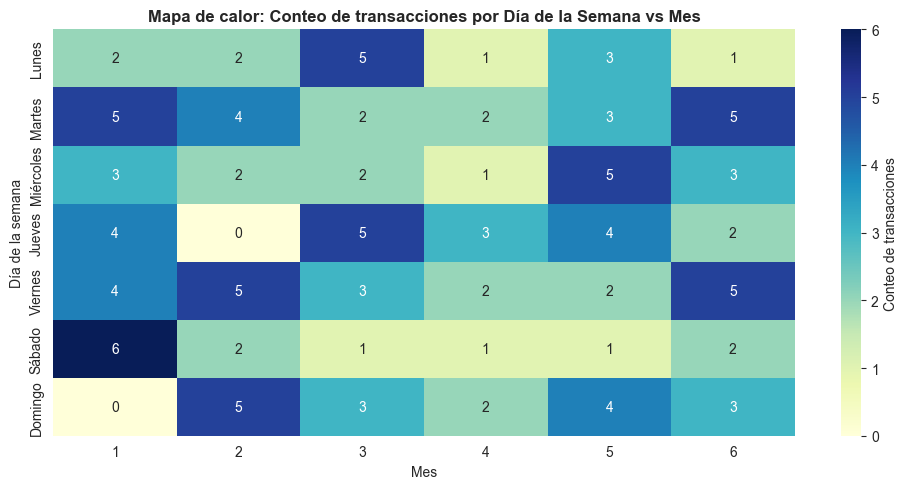

In [368]:
# Heatmap: Día de la semana vs Mes (conteos)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
print('Lo que está evaluando: Conteo de transacciones por Día de la Semana y Mes')
print('Tipo de gráfico: Heatmap (matriz de conteos)')
# Resumen estadístico previo: totales por día y por mes
if 'id_venta' in df_ventas_True.columns:
    total_tx = df_ventas_True['id_venta'].nunique() if df_ventas_True['id_venta'].dtype == 'object' else len(df_ventas_True)
else:
    total_tx = len(df_ventas_True)
print(f'Total aproximado de transacciones en el periodo: {total_tx:,}')
if 'mes' in df_ventas_True.columns and 'dia_semana' in df_ventas_True.columns:
    pivot = df_ventas_True.pivot_table(index='dia_semana', columns='mes', values='id_venta', aggfunc='count', fill_value=0)
    dias = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']
    pivot = pivot.reindex(dias).fillna(0)
    try:
        pivot = pivot[sorted(pivot.columns)]
    except Exception:
        pass
    # Estadística estratégica: día y mes con mayor volumen
    row_sums = pivot.sum(axis=1)
    col_sums = pivot.sum(axis=0)
    dia_max = row_sums.idxmax() if not row_sums.empty else 'N/A'
    mes_max = int(col_sums.idxmax()) if not col_sums.empty else 'N/A'
    print(f'Día con mayor volumen (total en periodo): {dia_max} | Mes más activo: {mes_max}')
    plt.figure(figsize=(10,5))
    sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Conteo de transacciones'})
    plt.title('Mapa de calor: Conteo de transacciones por Día de la Semana vs Mes', fontsize=12, weight='bold')
    plt.ylabel('Día de la semana')
    plt.xlabel('Mes')
    plt.tight_layout()
    plt.show()
else:
    print('No es posible generar heatmap: faltan columnas `mes` o `dia_semana`.')

💡 **Conclusión / Síntesis de negocio:**

El heatmap muestra las combinaciones día/mes que concentran el mayor volumen de transacciones. Si un par (día, mes) aparece consistentemente alto, se recomienda revisar staffing y disponibilidad de stock en esos períodos; si hay picos puntuales, investigar promociones o eventos que los generaron.

### 📚 Composición porcentual de Medios de Pago por Mes

**Tipo de gráfico:** Barra apilada porcentual (stacked bar %).

**Cómo:** se agrupa por `mes` y se suman las columnas OHE (prefijo `medio_pago_`). Luego se normaliza por fila para obtener porcentajes y se dibuja una barra apilada por mes. Se ordenan meses y se añade leyenda y formato consistente con el resto del notebook.

**Por qué:** revela cambios en la mezcla de medios de pago a lo largo del tiempo — útil para decisiones de producto y conciliación financiera.

Lo que está evaluando: Composición porcentual de medios de pago por mes
Tipo de gráfico: Barra apilada porcentual (stacked bar %)
Método de pago más usado en el periodo: Efectivo (~30.8% del volumen OHE)


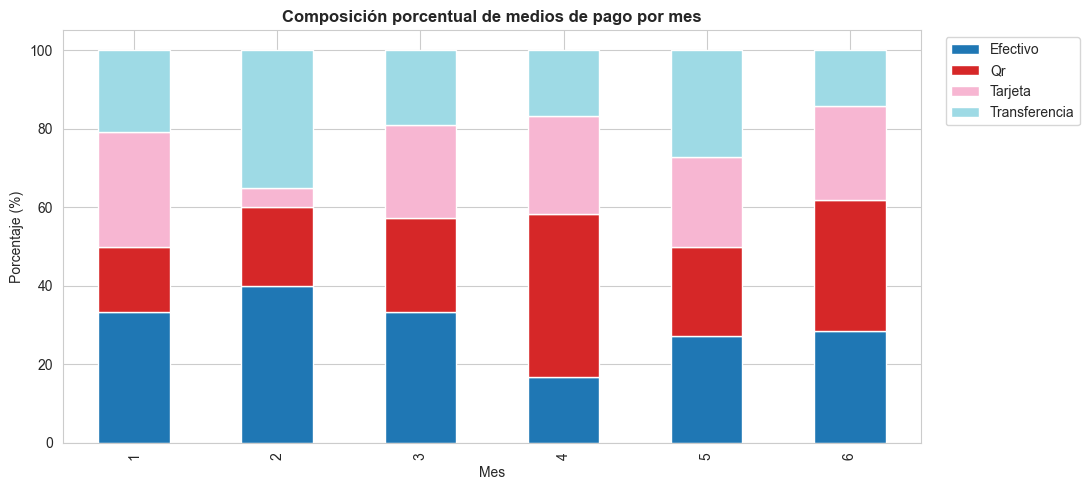

In [369]:
# Stacked bar: composición de medios de pago por mes (porcentaje)
import numpy as np
ohe_cols = [c for c in df_ventas_True.columns if c.startswith('medio_pago_')]
print('Lo que está evaluando: Composición porcentual de medios de pago por mes')
print('Tipo de gráfico: Barra apilada porcentual (stacked bar %)')
if ohe_cols and 'mes' in df_ventas_True.columns:
    df_ohe_month = df_ventas_True.groupby('mes')[ohe_cols].sum()
    try:
        df_ohe_month = df_ohe_month.reindex(sorted(df_ohe_month.index))
    except Exception:
        pass
    df_ohe_month_pct = df_ohe_month.div(df_ohe_month.sum(axis=1), axis=0).fillna(0) * 100
    # Resumen estratégico: método de pago más frecuente en el periodo
    totals = df_ohe_month.sum(axis=0).sort_values(ascending=False)
    top_method = totals.index[0].replace('medio_pago_x0_', '').replace('medio_pago_', '').replace('_', ' ').title() if not totals.empty else 'N/A'
    top_pct = totals.iloc[0] / totals.sum() * 100 if totals.sum() > 0 else 0
    print(f'Método de pago más usado en el periodo: {top_method} (~{top_pct:.1f}% del volumen OHE)')
    ax = df_ohe_month_pct.plot(kind='bar', stacked=True, figsize=(11,5), colormap='tab20')
    plt.title('Composición porcentual de medios de pago por mes', fontsize=12, weight='bold')
    plt.ylabel('Porcentaje (%)')
    plt.xlabel('Mes')
    handles, labels = ax.get_legend_handles_labels()
    labels = [l.replace('medio_pago_x0_', '').replace('medio_pago_', '').replace('_', ' ').title() for l in labels]
    ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.02,1))
    plt.tight_layout()
    plt.show()
else:
    print('No se puede dibujar la barra apilada: faltan OHE de medio_pago o columna `mes`.')

💡 **Conclusión / Síntesis de negocio:**

La composición porcentual muestra la participación relativa de cada medio de pago por mes. Si un método domina (>50%) persistente, puede implicar riesgos operativos o dependencia; si la mezcla cambia en el tiempo, investigar eventos o campañas que lo expliquen.

### 📈 Serie acumulada: Transacciones acumuladas en el tiempo

**Tipo de gráfico:** Serie temporal acumulada (línea).

**Cómo:** se indexa por `fecha`, se resamplea a frecuencia diaria contando `id_venta`, se rellena con ceros para días sin transacciones y se toma la suma acumulada. Se grafica la serie con una línea y marcas para facilitar la lectura de hitos.

**Por qué:** una serie acumulada muestra el ritmo de crecimiento y facilita la detección de cambios estructurales o picos en el periodo de análisis.

Lo que está evaluando: Ritmo de acumulación de transacciones en el tiempo
Tipo de gráfico: Serie temporal acumulada (línea)
Periodo: 2024-01-02 a 2024-06-28 | Total transacciones acumuladas: 120 | Promedio diario: 0.67


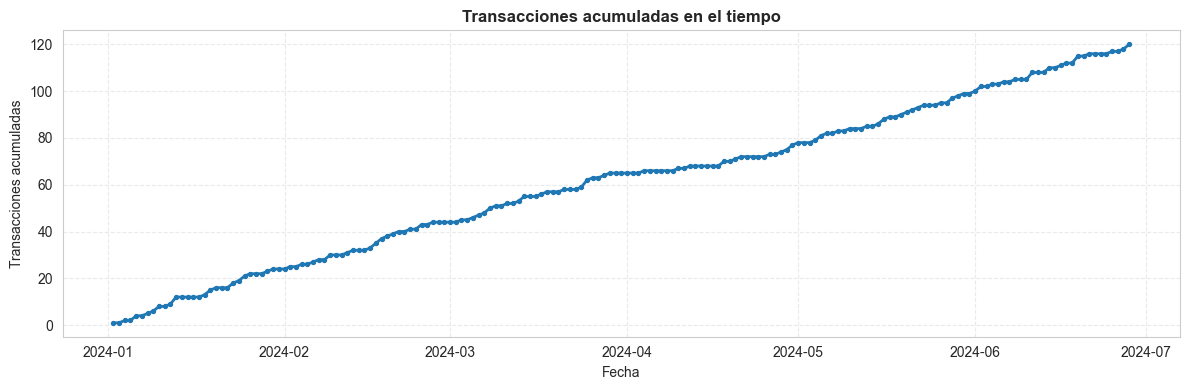

In [370]:
# Transacciones acumuladas en el tiempo (serie temporal)
print('Lo que está evaluando: Ritmo de acumulación de transacciones en el tiempo')
print('Tipo de gráfico: Serie temporal acumulada (línea)')
if 'fecha' in df_ventas_True.columns:
    df_time = df_ventas_True.set_index('fecha').sort_index()
    idx = pd.date_range(df_time.index.min(), df_time.index.max(), freq='D')
    daily_counts = df_time['id_venta'].resample('D').count().reindex(idx, fill_value=0)
    daily_cum = daily_counts.cumsum()
    # Estadística estratégica: periodo, total y promedio diario
    start, end = daily_cum.index.min().date(), daily_cum.index.max().date()
    total_final = daily_cum.iloc[-1] if len(daily_cum)>0 else 0
    avg_daily = daily_counts.mean()
    print(f'Periodo: {start} a {end} | Total transacciones acumuladas: {total_final:,} | Promedio diario: {avg_daily:.2f}')
    plt.figure(figsize=(12,4))
    plt.plot(daily_cum.index, daily_cum.values, color='tab:blue', linewidth=2)
    plt.scatter(daily_cum.index, daily_cum.values, color='tab:blue', s=8)
    plt.title('Transacciones acumuladas en el tiempo', fontsize=12, weight='bold')
    plt.ylabel('Transacciones acumuladas')
    plt.xlabel('Fecha')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()
else:
    print('No se puede generar la serie temporal: columna `fecha` ausente.')

💡 **Conclusión / Síntesis de negocio:**

La serie acumulada muestra el ritmo de crecimiento. Si la pendiente aumenta significativamente en un periodo, puede indicar una campaña o una anomalía que merece atención. Comparar la pendiente entre periodos ayuda a medir impacto de acciones comerciales.

In [371]:
# --- ANÁLISIS Y RESUMEN ESTADÍSTICO REPRESENTATIVO ---

# 1. Análisis de Medidas Centrales y Dispersión
print("📊 RESUMEN ESTADÍSTICO DE VARIABLES CLAVE (TRANSACCIONES Y RECURRENCIA)")
print("----------------------------------------------------------------------")
# Transacciones_cliente nos da una idea de la distribución de lealtad
print(df_ventas_True[['mes', 'trimestre', 'transacciones_cliente']].describe().T)

# 2. Resumen de Distribución de Medios de Pago (Análisis del OHE)
# La media de las columnas binarias es la proporción (probabilidad) de esa categoría.
columnas_ohe = [col for col in df_ventas_True.columns if col.startswith('medio_pago_')]
frecuencias_pago = df_ventas_True[columnas_ohe].mean().sort_values(ascending=False) * 100

print("\n\n📊 DISTRIBUCIÓN PORCENTUAL DE MEDIOS DE PAGO (ANÁLISIS OHE)")
print("------------------------------------------------------------")
# Formato limpio para presentar el resumen clave
print(frecuencias_pago.apply(lambda x: f"{x:.2f}%").to_string(header=False).replace('medio_pago_', ''))

# 3. Análisis de Frecuencia de Recurrencia (Insight clave para el negocio)
recurrencia_conteo = df_ventas_True.groupby('id_cliente')['transacciones_cliente'].first().value_counts().sort_index()
total_clientes = recurrencia_conteo.sum()
clientes_unicos = recurrencia_conteo.get(1, 0) # Clientes que compraron solo una vez
clientes_recurrentes = total_clientes - clientes_unicos

print("\n\n📊 RESUMEN DE RECURRENCIA DE CLIENTES")
print("-------------------------------------")
print(f"Total de Clientes Únicos en el período: {total_clientes}")
print(f"Clientes de 1 Transacción: {clientes_unicos} ({clientes_unicos/total_clientes:.1%})")
print(f"Clientes Recurrentes (>1 Transacción): {clientes_recurrentes} ({clientes_recurrentes/total_clientes:.1%})")

📊 RESUMEN ESTADÍSTICO DE VARIABLES CLAVE (TRANSACCIONES Y RECURRENCIA)
----------------------------------------------------------------------
                       count      mean       std  min   25%  50%  75%  max
mes                    120.0  3.425000  1.794775  1.0  2.00  3.0  5.0  6.0
trimestre              120.0  1.458333  0.500350  1.0  1.00  1.0  2.0  2.0
transacciones_cliente  120.0  2.283333  1.138946  1.0  1.75  2.0  3.0  5.0


📊 DISTRIBUCIÓN PORCENTUAL DE MEDIOS DE PAGO (ANÁLISIS OHE)
------------------------------------------------------------
efectivo         30.83%
qr               25.00%
transferencia    22.50%
tarjeta          21.67%


📊 RESUMEN DE RECURRENCIA DE CLIENTES
-------------------------------------
Total de Clientes Únicos en el período: 67
Clientes de 1 Transacción: 30 (44.8%)
Clientes Recurrentes (>1 Transacción): 37 (55.2%)


#### 📊 Distribución de `Medios de Pago`

Tipo de gráfico: Gráfico de Barras (univariado).

Cómo: se calcula la proporción media de cada columna OHE (`medio_pago_...`) y se representa como barras porcentuales para comparar participación relativa. Los valores se muestran en porcentaje sobre el total de transacciones.

Por qué: permite identificar cuál es el medio de pago dominante y su peso relativo — información útil para priorizar integraciones, analizar fees y diseñar estrategias de cobro.

Lo que está evaluando: Preferencia de medios de pago (participación porcentual)
Tipo de gráfico: Gráfico de barras (porcentual)
Método más frecuente: Efectivo (~30.8% de las transacciones)


C:\Users\Asus\AppData\Local\Temp\ipykernel_10312\2542425055.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres_limpios, y=frecuencias_pago_df.values, palette="rocket")


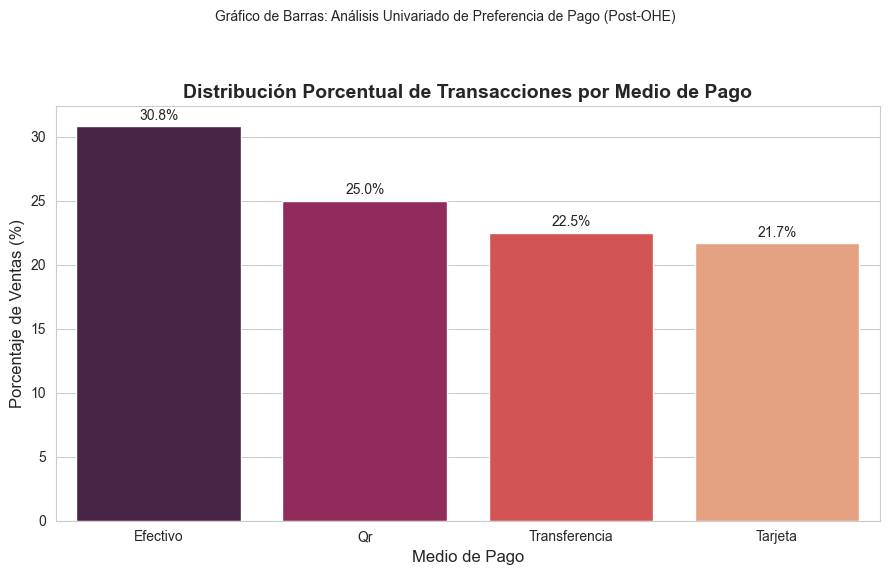

In [372]:
# Gráfico: Distribución porcentual de Medios de Pago (post-OHE)
print('Lo que está evaluando: Preferencia de medios de pago (participación porcentual)')
print('Tipo de gráfico: Gráfico de barras (porcentual)')
if len(columnas_ohe)==0:
    print('No hay columnas OHE detectadas para medios de pago.')
else:
    frecuencias_pago_df = (df_ventas_True[columnas_ohe].mean() * 100).sort_values(ascending=False)
    nombres_limpios = [col.replace('medio_pago_x0_', '').replace('medio_pago_', '').replace('_', ' ').title() for col in frecuencias_pago_df.index]
    # Resumen estadístico: top 1 y participación
    top_name = nombres_limpios[0] if len(nombres_limpios)>0 else 'N/A'
    top_val = frecuencias_pago_df.values[0] if len(frecuencias_pago_df)>0 else 0
    print(f'Método más frecuente: {top_name} (~{top_val:.1f}% de las transacciones)')
    plt.figure(figsize=(9, 6))
    sns.barplot(x=nombres_limpios, y=frecuencias_pago_df.values, palette="rocket")
    plt.title('Distribución Porcentual de Transacciones por Medio de Pago', fontsize=14, weight='bold')
    plt.suptitle('Gráfico de Barras: Análisis Univariado de Preferencia de Pago (Post-OHE)', fontsize=10, y=0.95)
    plt.ylabel('Porcentaje de Ventas (%)', fontsize=12)
    plt.xlabel('Medio de Pago', fontsize=12)
    plt.xticks(rotation=0)
    for i, valor in enumerate(frecuencias_pago_df.values):
        plt.text(i, valor + 0.5, f'{valor:.1f}%', ha='center', fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()

💡 **Conclusión / Síntesis de negocio:**

El gráfico univariado confirma cuál es el medio de pago dominante y su participación. Esto es útil para priorizar integraciones, optimizar conciliaciones y analizar comisiones/fees asociados.

#### 📈 Tendencia de Transacciones por Mes

Tipo de gráfico: Gráfico de Líneas (serie temporal mensual).

Cómo: se agrupan las transacciones por la columna `mes` y se cuentan `id_venta` por mes. La serie resultante se dibuja como línea con marcadores para visualizar cambios intermensuales.

Por qué: facilita la detección de estacionalidad, tendencias y picos que ayudan a planificar inventario y campañas comerciales.

Lo que está evaluando: Volumen mensual de transacciones (conteo por mes)
Tipo de gráfico: Gráfico de líneas (serie temporal mensual)
Mes con mayor volumen en el periodo: Ene (24 transacciones)


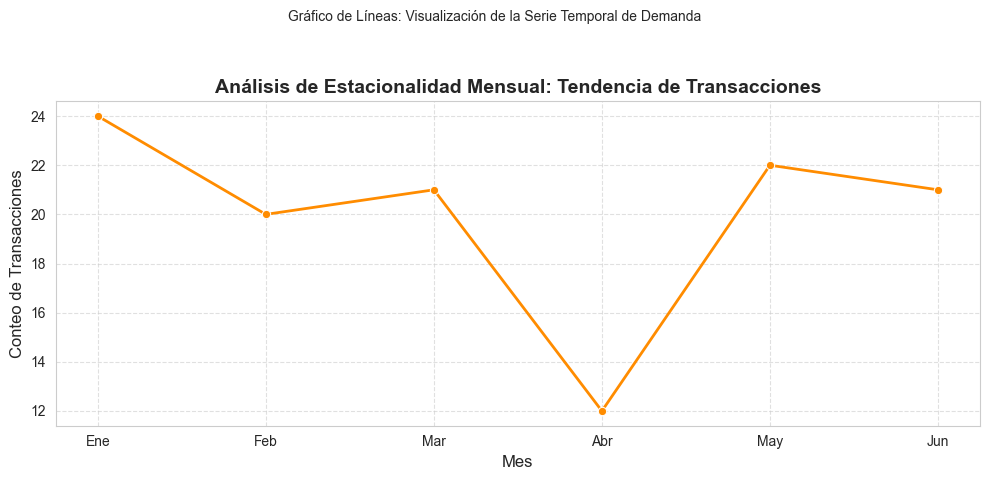

In [373]:
# Tendencia de transacciones por mes (serie mensual)
print('Lo que está evaluando: Volumen mensual de transacciones (conteo por mes)')
print('Tipo de gráfico: Gráfico de líneas (serie temporal mensual)')
transacciones_mes = df_ventas_True.groupby('mes')['id_venta'].count()
nombres_meses = {1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'}
etiquetas_mes = [nombres_meses.get(m, m) for m in transacciones_mes.index]
# Resumen estratégico: mes con mayor volumen
if not transacciones_mes.empty:
    mes_peak = transacciones_mes.idxmax()
    print(f'Mes con mayor volumen en el periodo: {nombres_meses.get(mes_peak, mes_peak)} ({transacciones_mes.max()} transacciones)')
else:
    print('No hay transacciones agrupadas por mes para resumir.')
plt.figure(figsize=(10, 5))
sns.lineplot(x=transacciones_mes.index, y=transacciones_mes.values, marker='o', color='darkorange', linewidth=2)
plt.title('Análisis de Estacionalidad Mensual: Tendencia de Transacciones', fontsize=14, weight='bold')
plt.suptitle('Gráfico de Líneas: Visualización de la Serie Temporal de Demanda', fontsize=10, y=0.95)
plt.ylabel('Conteo de Transacciones', fontsize=12)
plt.xlabel('Mes', fontsize=12)
plt.xticks(transacciones_mes.index, etiquetas_mes)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

💡 **Conclusión / Síntesis de negocio:**

La tendencia mensual permite observar estacionalidad y picos. Identificar meses pico ayuda a planificar inventario y campañas; si hay caídas sostenidas, es un indicador para investigar causas (competencia, stock, precios).

#### 📉 Demanda por Día de la Semana

Tipo de gráfico: Gráfico de Barras Ordenado (ordinal).

Cómo: se cuentan `id_venta` por `dia_semana` y se reindexa según el orden semanal en español para mantener la lógica ordinal (Lunes→Domingo).

Por qué: muestra la distribución operativa por día y ayuda en la asignación de recursos, horarios de atención y planificación logística.

Lo que está evaluando: Conteo de transacciones por Día de la Semana
Tipo de gráfico: Gráfico de barras ordenado
Día con mayor demanda: Martes (21 transacciones)


C:\Users\Asus\AppData\Local\Temp\ipykernel_10312\34671193.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transacciones_dia = df_ventas_True.groupby('dia_semana')['id_venta'].count().reindex(orden_dias_es)
C:\Users\Asus\AppData\Local\Temp\ipykernel_10312\34671193.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transacciones_dia.index, y=transacciones_dia.values, palette="tab10")


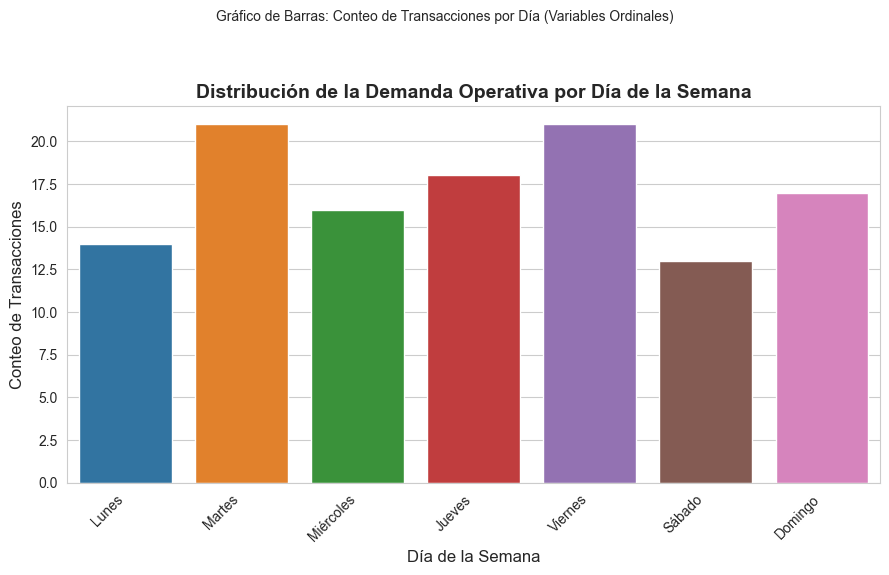

In [374]:
# Demanda por día de la semana (barras ordenadas)
print('Lo que está evaluando: Conteo de transacciones por Día de la Semana')
print('Tipo de gráfico: Gráfico de barras ordenado')
transacciones_dia = df_ventas_True.groupby('dia_semana')['id_venta'].count().reindex(orden_dias_es)
# Resumen estratégico: día con mayor demanda
if not transacciones_dia.empty:
    dia_top = transacciones_dia.idxmax()
    print(f'Día con mayor demanda: {dia_top} ({transacciones_dia.max()} transacciones)')
else:
    print('No hay datos de transacciones por día de la semana.')
plt.figure(figsize=(9, 6))
sns.barplot(x=transacciones_dia.index, y=transacciones_dia.values, palette="tab10")
plt.title('Distribución de la Demanda Operativa por Día de la Semana', fontsize=14, weight='bold')
plt.suptitle('Gráfico de Barras: Conteo de Transacciones por Día (Variables Ordinales)', fontsize=10, y=0.95)
plt.ylabel('Conteo de Transacciones', fontsize=12)
plt.xlabel('Día de la Semana', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

💡 **Conclusión / Síntesis de negocio:**

Determinar los días con mayor demanda ayuda a planificar turnos y promociones. Si hay un día consistentemente alto, ajustar staffing y disponibilidad en ese día mejora servicio al cliente.

#### 📈 Histograma de Recurrencia (Fidelidad de Clientes)

Tipo de gráfico: Histograma de frecuencias (discreto).

Cómo: se toma el conteo de transacciones por `id_cliente` y se grafica la distribución con bins discretos (0.5 offsets) para representar valores enteros de número de compras.

Por qué: permite evaluar la lealtad de la base (qué proporción compra solo una vez vs recurrentes) y orientar estrategias de retención o fidelización.

Lo que está evaluando: Distribución de recurrencia (transacciones por cliente)
Tipo de gráfico: Histograma de frecuencias (discreto)
Mediana: 2.0 | Promedio: 1.79 | % clientes con 1 compra: 44.8%


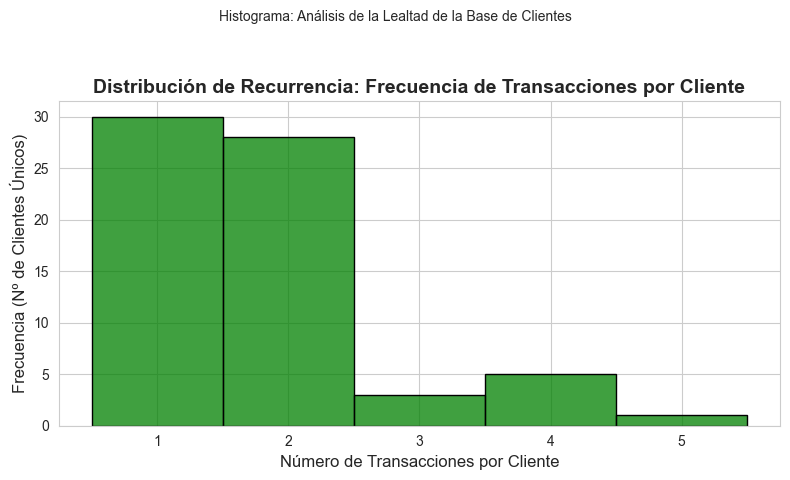

In [375]:
# Histograma de recurrencia: número de transacciones por cliente
print('Lo que está evaluando: Distribución de recurrencia (transacciones por cliente)')
print('Tipo de gráfico: Histograma de frecuencias (discreto)')
clientes_recurrentes = df_ventas_True.groupby('id_cliente')['transacciones_cliente'].first()
if clientes_recurrentes.empty:
    print('No hay datos de recurrencia por cliente para graficar.')
else:
    mediana = clientes_recurrentes.median()
    promedio = clientes_recurrentes.mean()
    pct_unicos = (clientes_recurrentes==1).mean() * 100
    print(f'Mediana: {mediana} | Promedio: {promedio:.2f} | % clientes con 1 compra: {pct_unicos:.1f}%')
    plt.figure(figsize=(8, 5))
    sns.histplot(clientes_recurrentes, bins=np.arange(clientes_recurrentes.max() + 2) - 0.5, kde=False, color='green', edgecolor='black', discrete=True)
    plt.title('Distribución de Recurrencia: Frecuencia de Transacciones por Cliente', fontsize=14, weight='bold')
    plt.suptitle('Histograma: Análisis de la Lealtad de la Base de Clientes', fontsize=10, y=0.95)
    plt.xlabel('Número de Transacciones por Cliente', fontsize=12)
    plt.ylabel('Frecuencia (Nº de Clientes Únicos)', fontsize=12)
    plt.xticks(np.arange(1, clientes_recurrentes.max() + 1))
    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()


#### 🏆 Top 10 Clientes por Cantidad de Compras

**Tipo de gráfico:** Gráfico de Barras (Top N).

**Cómo:** se agrupan las transacciones por `id_cliente`, se cuenta el número de ventas por cliente y se seleccionan los 10 con mayor volumen. Se ordenan descendentemente y se dibuja un gráfico de barras con anotaciones sobre cada barra para mostrar el valor absoluto.

**Por qué:** identificar a los clientes más activos ayuda a priorizar análisis de segmentación, modelos de retención y acciones comerciales (programas VIP, cross-sell).

Lo que está evaluando: Top 10 clientes por número de compras
Tipo de gráfico: Gráfico de Barras (Top N)
Total transacciones: 120 | Clientes únicos: 67
Top cliente: 56 con 5 transacciones (4.2% del total)


C:\Users\Asus\AppData\Local\Temp\ipykernel_10312\1493218089.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.index.astype(str), y=top10.values, palette='tab10')


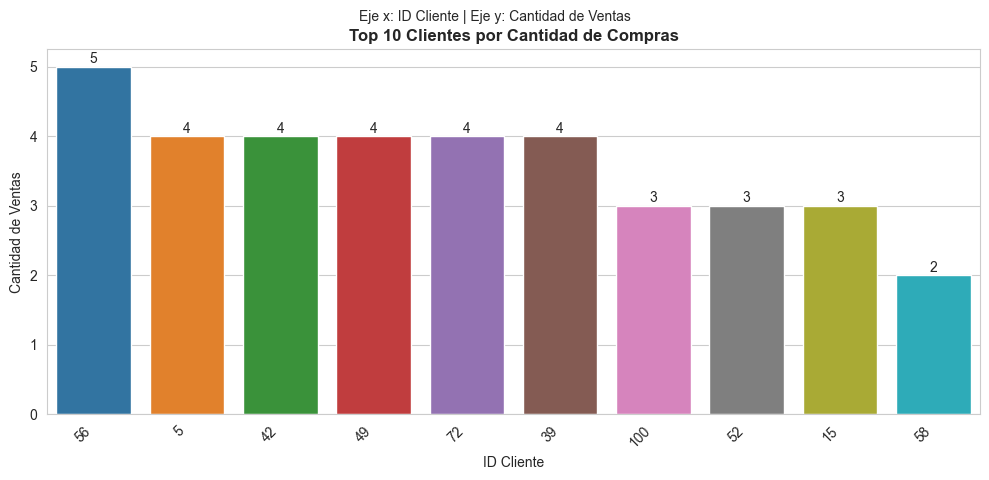

In [376]:
# Código: Top 10 Clientes por cantidad de compras (gráfico)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
print('Lo que está evaluando: Top 10 clientes por número de compras')
print('Tipo de gráfico: Gráfico de Barras (Top N)')
if 'id_cliente' in df_ventas_True.columns:
    top10 = df_ventas_True.groupby('id_cliente')['id_venta'].count().sort_values(ascending=False).head(10)
    total_trans = len(df_ventas_True)
    clientes_unicos = df_ventas_True['id_cliente'].nunique()
    top_cliente = top10.index[0] if len(top10)>0 else 'N/A'
    top_count = int(top10.iloc[0]) if len(top10)>0 else 0
    print(f'Total transacciones: {total_trans:,} | Clientes únicos: {clientes_unicos:,}')
    print(f'Top cliente: {top_cliente} con {top_count:,} transacciones ({top_count/total_trans:.1%} del total)')
    plt.figure(figsize=(10,5))
    sns.barplot(x=top10.index.astype(str), y=top10.values, palette='tab10')
    plt.title('Top 10 Clientes por Cantidad de Compras', fontsize=12, weight='bold')
    plt.suptitle('Eje x: ID Cliente | Eje y: Cantidad de Ventas', fontsize=10, y=0.95)
    plt.xlabel('ID Cliente')
    plt.ylabel('Cantidad de Ventas')
    plt.xticks(rotation=45, ha='right')
    # Anotar valores encima de las barras
    maxv = top10.values.max() if len(top10)>0 else 0
    for i, v in enumerate(top10.values):
        plt.text(i, v + maxv*0.01, f'{int(v):,}', ha='center')
    plt.tight_layout()
    plt.show()
else:
    print("Columna 'id_cliente' no encontrada en df_ventas_True.")

💡 **Conclusión / Síntesis de negocio:**

Si la mayoría de clientes realiza 1 sola compra (% alto), la estrategia debería enfocarse en retención (fidelización). Si hay una masa significativa de clientes recurrentes, explorar programas VIP o cross-sell.

#### 📉 Análisis Bivariado (Recurrencia vs. Días de la Semana)

Tipo de gráfico: Gráfico de Barras Bivariado (media condicional).

Cómo: se calcula la media de `transacciones_cliente` por `dia_semana` y se visualiza en barras ordenadas según la semana en español.

Por qué: muestra diferencias en la lealtad promedio de clientes según el día, lo que puede orientar promociones segmentadas o staffing en días donde los clientes más leales compran.

Lo que está evaluando: Recurrencia promedio (transacciones por cliente) por Día de la Semana
Tipo de gráfico: Gráfico de barras bivariado (media condicional)
Día con mayor recurrencia promedio: Jueves (2.56 transacciones promedio)


C:\Users\Asus\AppData\Local\Temp\ipykernel_10312\311510471.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recurrencia_por_dia = df_ventas_True.groupby('dia_semana')['transacciones_cliente'].mean().reindex(orden_dias_es)
C:\Users\Asus\AppData\Local\Temp\ipykernel_10312\311510471.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recurrencia_por_dia.index, y=recurrencia_por_dia.values, palette="vlag")


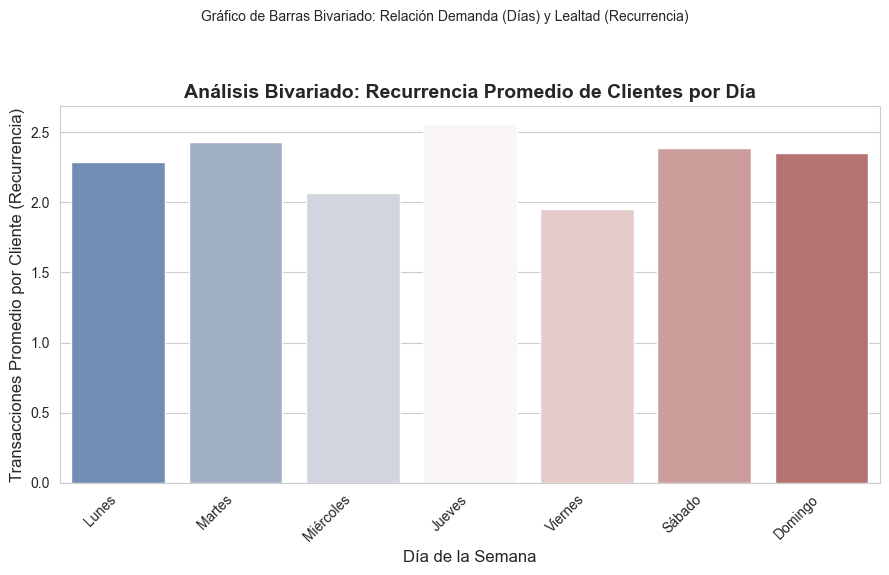

In [377]:
# Bivariado: Recurrencia promedio por Día de la semana
print('Lo que está evaluando: Recurrencia promedio (transacciones por cliente) por Día de la Semana')
print('Tipo de gráfico: Gráfico de barras bivariado (media condicional)')
recurrencia_por_dia = df_ventas_True.groupby('dia_semana')['transacciones_cliente'].mean().reindex(orden_dias_es)
if recurrencia_por_dia.empty:
    print('No hay datos para calcular recurrencia por día.')
else:
    top_dia = recurrencia_por_dia.idxmax()
    print(f'Día con mayor recurrencia promedio: {top_dia} ({recurrencia_por_dia.max():.2f} transacciones promedio)')
plt.figure(figsize=(9, 6))
sns.barplot(x=recurrencia_por_dia.index, y=recurrencia_por_dia.values, palette="vlag")
plt.title('Análisis Bivariado: Recurrencia Promedio de Clientes por Día', fontsize=14, weight='bold')
plt.suptitle('Gráfico de Barras Bivariado: Relación Demanda (Días) y Lealtad (Recurrencia)', fontsize=10, y=0.95)
plt.ylabel('Transacciones Promedio por Cliente (Recurrencia)', fontsize=12)
plt.xlabel('Día de la Semana', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

💡 **Conclusión / Síntesis de negocio:**

Comparar recurrencia por día ayuda a entender en qué días los clientes más leales compran. Si los días de mayor recurrencia coinciden con días altos en volumen, son días prioritarios para iniciativas de retención.

### 💳 Evolución de Medio de Pago por Mes

**Tipo de gráfico:** Series temporales (líneas) por cada medio de pago, agregadas por mes.

**Cómo:** si existen las columnas OHE (`medio_pago_...`) se resamplean estas columnas por mes (suma de transacciones). Si no existen, se intenta agrupar por la columna `medio_pago` original (si aún está presente) y pivotar por mes. El eje X representa la fecha (mes), el eje Y la cantidad de ventas por medio de pago.

**Por qué:** mostrar la evolución por mes permite identificar tendencias en la preferencia de pago, detectar cambios estacionales o el impacto de campañas/medidas operativas en la mezcla de medios de pago.

Lo que está evaluando: Evolución mensual de la cantidad de ventas por Medio de Pago
Tipo de gráfico: Series temporales (líneas) por medio de pago
Método con mayor volumen acumulado en el periodo: Efectivo (37 ventas)


C:\Users\Asus\AppData\Local\Temp\ipykernel_10312\9708250.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_month = df_time[ohe_cols].resample('M').sum()


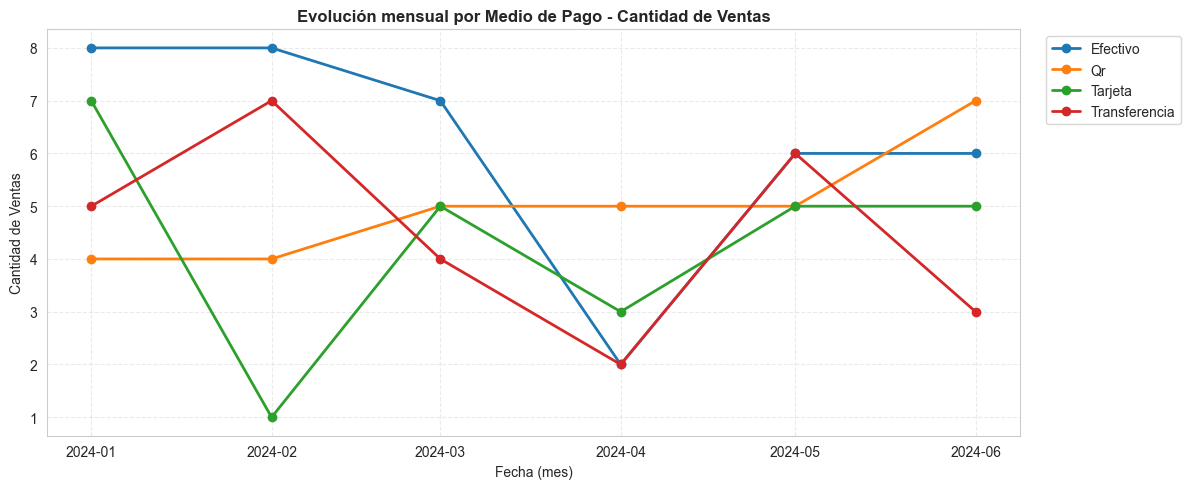

In [378]:
# Evolución de Medio de Pago por Mes: eje y = Cantidad de Ventas, eje x = Fecha (mes)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
print('Lo que está evaluando: Evolución mensual de la cantidad de ventas por Medio de Pago')
print('Tipo de gráfico: Series temporales (líneas) por medio de pago')
ohe_cols = [c for c in df_ventas_True.columns if c.startswith('medio_pago_')]
if 'fecha' not in df_ventas_True.columns:
    print('No se puede generar la serie: falta la columna `fecha`.')
else:
    df_time = df_ventas_True.set_index('fecha').sort_index()
    if ohe_cols:
        df_month = df_time[ohe_cols].resample('M').sum()
        df_month.index = df_month.index.to_period('M').to_timestamp()
        # Resumen estratégico: totales por método en el periodo
        totals = df_month.sum().sort_values(ascending=False)
        if not totals.empty:
            top = totals.index[0].replace('medio_pago_x0_', '').replace('medio_pago_', '').replace('_',' ').title()
            print(f'Método con mayor volumen acumulado en el periodo: {top} ({totals.iloc[0]:.0f} ventas)')
        plt.figure(figsize=(12,5))
        for col in df_month.columns:
            label = col.replace('medio_pago_x0_', '').replace('medio_pago_', '').replace('_', ' ').title()
            plt.plot(df_month.index, df_month[col], marker='o', linewidth=2, label=label)
        plt.title('Evolución mensual por Medio de Pago - Cantidad de Ventas', fontsize=12, weight='bold')
        plt.xlabel('Fecha (mes)')
        plt.ylabel('Cantidad de Ventas')
        plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.tight_layout()
        plt.show()
    elif 'medio_pago' in df_ventas_True.columns:
        grouped = df_ventas_True.groupby([pd.Grouper(key='fecha', freq='M'), 'medio_pago'])['id_venta'].count().unstack(fill_value=0)
        grouped.index = grouped.index.to_period('M').to_timestamp()
        totals = grouped.sum().sort_values(ascending=False)
        if not totals.empty:
            print(f'Método con mayor volumen acumulado en el periodo: {totals.index[0]} ({totals.iloc[0]:.0f} ventas)')
        plt.figure(figsize=(12,5))
        for col in grouped.columns:
            plt.plot(grouped.index, grouped[col], marker='o', linewidth=2, label=str(col))
        plt.title('Evolución mensual por Medio de Pago - Cantidad de Ventas', fontsize=12, weight='bold')
        plt.xlabel('Fecha (mes)')
        plt.ylabel('Cantidad de Ventas')
        plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.tight_layout()
        plt.show()
    else:
        print('No se encontraron columnas de medio de pago (ni OHE ni columna `medio_pago`).')

💡 **Conclusión / Síntesis de negocio:**

La evolución mensual por medio de pago muestra tendencias y desplazamientos en la preferencia de los clientes. Si un método crece rápidamente, puede requerir ajustes en fees o infraestructura. Si decrece, estudiar causas (usabilidad, comisiones, problemas técnicos).